### A classification model that aims to predict the passengers who survived the titanic shipwreck. 

### Week2 Assignment ..submitted by Jophy Joseph -- Jun 12, 2022


SL.No	Attribute	Description

1.	Survived	Outcome of survival (0 = No; 1 = Yes)
2.	Pclass	Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
3.	Name	Name of passenger
4.	Sex	Sex of the passenger
5.	 Age	Age of the passenger (Some entries contain NaN)
6.	SibSp	Number of siblings and spouses of the passenger aboard
7.	Parch	Number of parents and children of the passenger aboard
8.	Ticket	Ticket number of the passenger
9.	 Fare	Fare paid by the passenger
10.	Cabin	Cabin number of the passenger (Some entries contain NaN)
11.	Embarked	Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)


In [3]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Step1:  Reading  and Understanding the Data

1. Importing data using the pandas library
2. Understanding the structure of the data

In [5]:
df_titanic = pd.read_csv('Titanic+Data+Set.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_titanic.shape

(891, 12)

In [7]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Step 2 : Data Cleaning, Preparation and Basic EDA

In [9]:
df_titanic.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [10]:
df_titanic.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [11]:
df_titanic.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [12]:
#Checking for duplicates
df_titanic.loc[df_titanic.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [13]:
#no duplicates

In [14]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Inferences:

    1.) Cabin has a lot of null values .. about 687 out of 891 ..so shud not be used for analysis
    2.) Age also has a significant number of nulls. So needs to be imputed
    3.) Two embarkation ports are missing

In [15]:
## Missing ages imputation by mean age value based on sex and Pclass
missing_ages = df_titanic[df_titanic['Age'].isnull()]
# determine mean age based on Sex and Pclass
mean_ages = df_titanic.groupby(['Sex','Pclass'])['Age'].mean()

def replace_na_ages(row):
    '''
    function to check if the age is null and replace wth the mean from 
    the mean ages dataframe 
    '''
    if pd.isnull(row['Age']):
        return mean_ages[row['Sex'],row['Pclass']]
    else:
        return row['Age']

df_titanic['Age'] = df_titanic.apply(replace_na_ages, axis=1)

In [16]:
df_titanic.shape

(891, 12)

In [17]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
## Missing embarkation ports imputation

# In order to populate the missing embarked ports, first determine if the people with the missing information 
# may have been travelling with others

missing_ports = df_titanic[df_titanic['Embarked'].isnull()]
missing_ports

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [19]:
# search by the above ticket number and cabin
df_titanic[(df_titanic['Embarked'].notnull()) & ((df_titanic['Ticket'] == '113572') | (df_titanic['Cabin'] == 'B28'))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [20]:
# Searching for similar records did not return any results. Looks like both were travelling in the same cabin, 
# with the same ticket number and the bulk of passengers were travelling from Southhampton
# I have choosen to use Southhampton as the missing value.

df_titanic['Embarked'].fillna('S',inplace=True)

In [21]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [22]:
## Removing unwanted columns - PassengerId, Cabin, Name and Ticket

df_titanic = df_titanic.drop(['PassengerId','Cabin','Name','Ticket'], axis=1)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [23]:
df_titanic.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [24]:
# One Hot Encoding for Sex column

ohe_sex = pd.get_dummies(df_titanic['Sex'])
ohe_sex
df_titanic = df_titanic.join(ohe_sex)


In [25]:
df_titanic.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male
0,0,3,male,22.0,1,0,7.2500,S,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0
2,1,3,female,26.0,0,0,7.9250,S,1,0


In [26]:
df_titanic = df_titanic.drop(['Sex'],axis=1)

In [27]:
df_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,0,3,22.0,1,0,7.2500,S,0,1
1,1,1,38.0,1,0,71.2833,C,1,0
2,1,3,26.0,0,0,7.9250,S,1,0
3,1,1,35.0,1,0,53.1000,S,1,0
4,0,3,35.0,0,0,8.0500,S,0,1


In [28]:
## OHE for Embarked
ohe_embarked = pd.get_dummies(df_titanic['Embarked'],prefix='Port')
df_titanic.drop(['Embarked'],axis=1)
df_titanic = pd.concat([df_titanic,ohe_embarked],axis=1)

In [29]:
df_titanic.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male,Port_C,Port_Q,Port_S
0,0,3,22.0,1,0,7.2500,S,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,C,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,S,1,0,0,0,1


In [30]:
#moving the target column to end of the df
target = df_titanic['Survived']
df_titanic = df_titanic.drop(columns='Survived').join(target)

In [31]:
df_titanic.head(3)

,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male,Port_C,Port_Q,Port_S,Survived
0,3,22.0,1,0,7.2500,S,0,1,0,0,1,0
1,1,38.0,1,0,71.2833,C,1,0,1,0,0,1
2,3,26.0,0,0,7.9250,S,1,0,0,0,1,1


In [32]:
df_titanic.skew()

Pclass     -0.630548
Age         0.498421
SibSp       3.695352
Parch       2.749117
Fare        4.787317
female      0.618921
male       -0.618921
Port_C      1.595149
Port_Q      2.948778
Port_S     -1.009665
Survived    0.478523
dtype: float64

In [33]:
df_titanic.corr()

,Pclass,Age,SibSp,Parch,Fare,female,male,Port_C,Port_Q,Port_S,Survived
Pclass,1.000000,-0.407015,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.074053,-0.338481
Age,-0.407015,1.000000,-0.251313,-0.180705,0.118308,-0.112851,0.112851,0.041504,-0.084069,0.016545,-0.067485
SibSp,0.083081,-0.251313,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.068734,-0.035322
Parch,0.018443,-0.180705,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.060814,0.081629
Fare,-0.549500,0.118308,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.162184,0.257307
female,-0.131900,-0.112851,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.119224,0.543351
male,0.131900,0.112851,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.119224,-0.543351
Port_C,-0.243292,0.041504,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.782742,0.168240
Port_Q,0.221009,-0.084069,-0.026354,-0.081228,-0.117216,0.074115,-0.074115,-0.148258,1.000000,-0.499421,0.003650
Port_S,0.074053,0.016545,0.068734,0.060814,-0.162184,-0.119224,0.119224,-0.782742,-0.499421,1.000000,-0.149683


In [34]:
#dropping column 'male' as only one required
df_titanic = df_titanic.drop(['male'], axis=1)

In [35]:
df_titanic.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,female,Port_C,Port_Q,Port_S,Survived
0,3,22.0,1,0,7.2500,S,0,0,0,1,0
1,1,38.0,1,0,71.2833,C,1,1,0,0,1
2,3,26.0,0,0,7.9250,S,1,0,0,1,1
3,1,35.0,1,0,53.1000,S,1,0,0,1,1
4,3,35.0,0,0,8.0500,S,0,0,0,1,0


In [36]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
 6   female    891 non-null    uint8  
 7   Port_C    891 non-null    uint8  
 8   Port_Q    891 non-null    uint8  
 9   Port_S    891 non-null    uint8  
 10  Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(1), uint8(4)
memory usage: 52.3+ KB


In [37]:
df_titanic = df_titanic.drop(['Embarked'], axis=1)

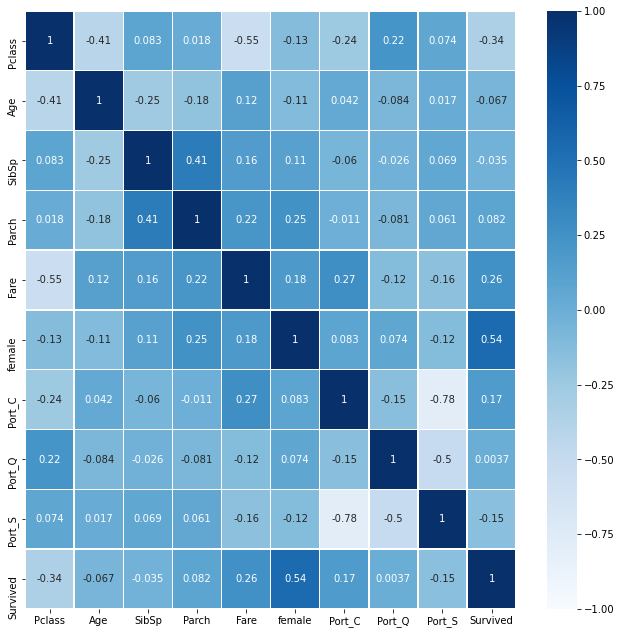

In [38]:
plt.figure(figsize=(11,11))
sns.heatmap(df_titanic.corr(),
            annot=True,
            linewidths=.5,
            cmap="Blues",
            vmax=1.0,
            vmin=-1.0)
plt.show()

In [39]:
#save the prepared csv file
df_titanic.to_csv("titanic_prepared_v1.2.csv")

### Step 3 : Train-Test Split  and Model building

In [40]:
from sklearn.model_selection import train_test_split

## separate the target and independent features
X = df_titanic.drop('Survived',axis=1)
y = df_titanic['Survived']

## Split the dataset into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [44]:
def fit_n_run(model):  # take the model, fit and check train, test scores
    
    model.fit(X_train, y_train)   # fit the model with the train data
    print(model, " model trained")
    
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print("Train Accuracy for this run:", train_accuracy)
    print("Test Accuracy for this run: ", test_accuracy)
    print(model, " Model")    

### Step 4 : Incorporating mlflow

In [45]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import mlflow
import mlflow.sklearn
from mlflow import log_metric, log_param, log_artifacts
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment(experiment_name='Titanic model tracking 2')
mlflow.autolog()  ##record automatically all metrics and other params 

2022/06/12 22:08:15 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2022/06/12 22:08:15 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2022/06/12 22:08:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


####  Model 1 -- RandomForestClassifier (default hyperparameters)

In [52]:
model_rf = RandomForestClassifier()
fit_n_run(model_rf)

2022/06/12 22:50:58 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '7a38eee8375040faba6033505283cc4f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


RandomForestClassifier()  model trained
Train Accuracy for this run: 0.9791332263242376
Test Accuracy for this run:  0.8283582089552238
RandomForestClassifier()  Model


####  Model 2 -- RandomForestClassifier (max_depth=5,  n_estimators=200, warm_start=True,min_samples_split=4)

In [53]:
model_rf_params1 = RandomForestClassifier( max_depth=5,  n_estimators=200, warm_start=True,min_samples_split=4 )
fit_n_run(model_rf_params1)

2022/06/12 22:53:49 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'd4e7de7bc8dc4becb34036c70198ab36', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=200,
                       warm_start=True)  model trained
Train Accuracy for this run: 0.8571428571428571
Test Accuracy for this run:  0.8134328358208955
RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=200,
                       warm_start=True)  Model


#### Model 3 - DecisionTreeClassifier()

In [49]:
model_dt = DecisionTreeClassifier()
fit_n_run(model_dt)

2022/06/12 22:17:21 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '11377b1a80f3452cb29ce0649bd1da99', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


DecisionTreeClassifier()  model trained
Train Accuracy for this run: 0.9791332263242376
Test Accuracy for this run:  0.7649253731343284
DecisionTreeClassifier()  Model


#### Model 4 - DecisionTreeClassifier( criterion='entropy',max_depth=3,max_leaf_nodes=2)

In [51]:
model_dt_params1 = DecisionTreeClassifier(criterion='entropy',max_depth=3,max_leaf_nodes=2)
fit_n_run(model_dt_params1)

2022/06/12 22:24:47 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'e485f7705f6544eca41a961a80a6a790', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=2)  model trained
Train Accuracy for this run: 0.7865168539325843
Test Accuracy for this run:  0.7873134328358209
DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=2)  Model
